In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

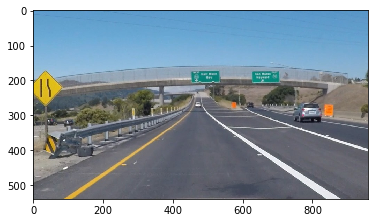

In [39]:
image = mpimg.imread('exit-ramp.jpg')
plt.imshow(image)
plt.show()

### Gradient-Sobel Operator
### 1. x, y gradient

In [73]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(20,200)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F,1,0,ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F,0,1,ksize=sobel_kernel))
    
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) &
                  (scaled_sobel <= thresh[1])] = 1
    
    return binary_output

def img_plt(img):
    plt.imshow(img, cmap='gray')
    plt.show

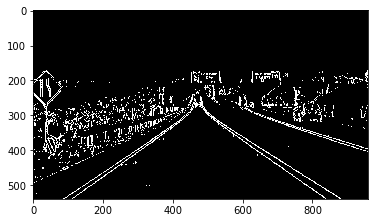

In [74]:
binary_x = abs_sobel_thresh(image, orient='x')
binary_y = abs_sobel_thresh(image, orient='y')
img_plt(binary_x)

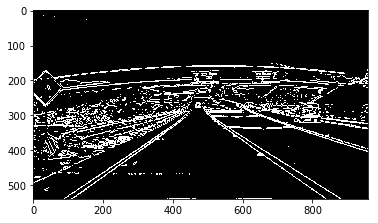

In [75]:
img_plt(binary_y)

### 2. Magnitude of the Gradient

In [83]:
def mag_thresh(img, sobel_kernel=3, thresh=(0,255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255
    gradmag = (gradmag/scale_factor).astype(np.uint8)
    
    # Create a binary image of ones where threshold is met
    # 0 otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= thresh[0]) &
                  (gradmag <= thresh[1])] = 1
    
    return binary_output

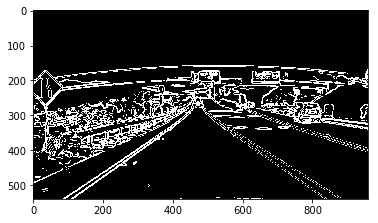

In [85]:
binary_grad = mag_thresh(image, sobel_kernel=9, thresh=(30,100))
img_plt(binary_grad)

### 3. Direction of the Gradient

In [86]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2.)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F,0,1,ksize=sobel_kernel)
    # take the absolute value of the gradient dir
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output = np.zeros_like(absgraddir)
    binary_output[(absgraddir>=thresh[0])&
                  (absgraddir<=thresh[1])] = 1
    return binary_output

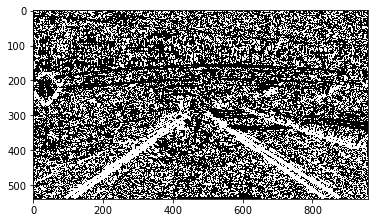

In [101]:
binary_dir = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
img_plt(binary_dir)

### Summary
### Combining Gradient

In [104]:
ksize = 3

gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(30,100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30,100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, thresh=(30,100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7,1.3))

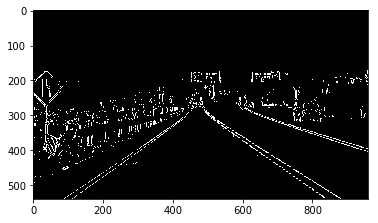

In [107]:
img_plt(gradx)

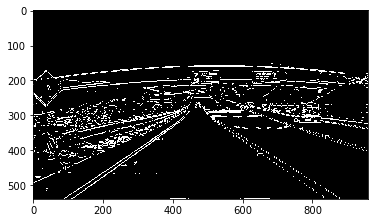

In [110]:
img_plt(grady)

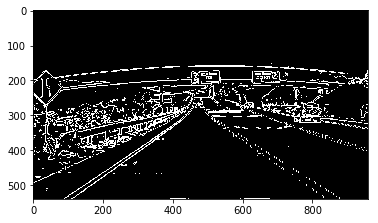

In [111]:
img_plt(mag_binary)

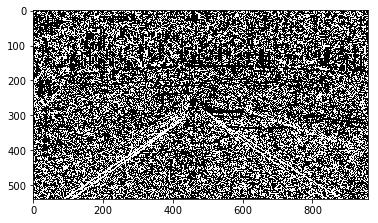

In [112]:
img_plt(dir_binary)